# Кодирование признаков. Методы

Ещё одним важным этапом проектирования признаков является обработка нечисловых (категориальных) признаков. Многие модели машинного обучения не умеют работать с категориальными данными. Если мы передадим на вход модели такие признаки, она выдаст ошибку. 

Процесс преобразования категориальных данных в признаки, пригодные для обучения, называется кодированием признаков.

Для лучшего усвоения материала предлагаем вам повторить типы категориальных признаков в ранее пройденном модуле PYTHON-11. Базовые приемы работы с данными в Pandas Юнит 5. Тип данных Category.

Существует множество методов кодирования. Выбор подходящего метода часто превращается в сложную задачу. Для упрощения этой задачи мы будем использовать схему выбора метода кодирования, изображённую на рисунке ниже.

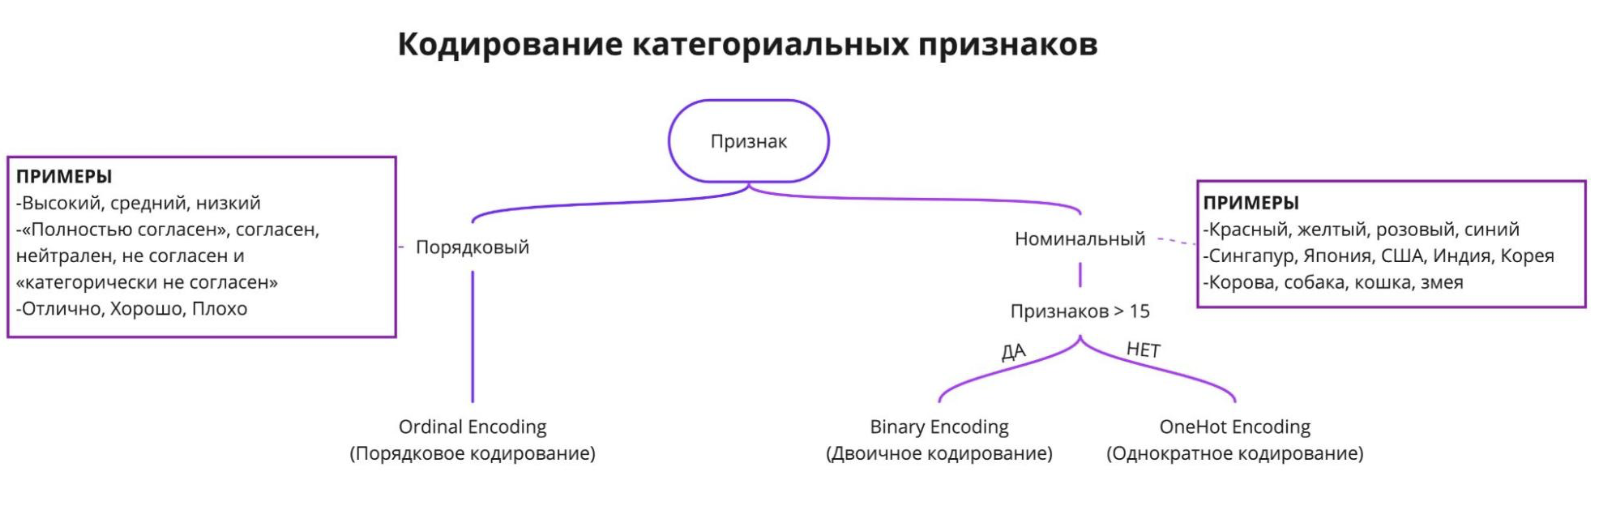

Эта схема предназначена только для категориальных признаков.

Если признак, который вы собираетесь кодировать, порядковый, используйте **порядковое кодирование** (Ordinal Encoding). 

Для **номинальных признаков** важно количество уникальных значений признака, так как при их большом количестве могут возникать проблемы с памятью. Если у признака меньше 15 значений, следует выбирать для данных **однократное кодирование** (OneHot Encoding). Число 15 выбрано эмпирически — для вашего набора данных это число может быть 20 или 10. Это зависит от количества признаков в вашем датасете, количестве строк и многих других факторов. Если признаков немного, то вы также можете воспользоваться однократным кодированием. В других ситуациях вам стоит выбрать другой способ кодирования, например **бинарный** (Binary Encoding).

Ниже мы рассмотрим методы кодирования, обозначенные в блок-схеме. Для кодирования категориальных признаков мы будем использовать библиотеку category_encoders. Это удобная библиотека для кодирования категориальных переменных различными методами.

Импортируем библиотеку category-encoders и др. для дальнейшего использования. 

In [72]:
import category_encoders as ce
import pandas as pd 
import numpy as np 
import plotly.express as px

Рассмотрим следующие популярные способы кодирования: 

* порядковое кодирование (Ordinal Encoding); 
* однократное кодирование (OneHot Encoding); 
* бинарное кодирование (Binary Encoding).

Создадим обучающий набор для кодирования порядковых признаков — ассортимент небольшого магазина с одеждой, где size — буквенное обозначение размера одежды, type — тип изделия.

In [73]:
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


## ПОРЯДКОВОЕ КОДИРОВАНИЕ. ORDINAL ENCODING

В порядковой кодировке признаков каждому строковому значению присваивается значение в виде целого числа, свойственного для конкретного значения строки.

Результат кодирования порядкового признака size будет выглядеть так: каждому строковому значению присваивается значение в виде целого числа.

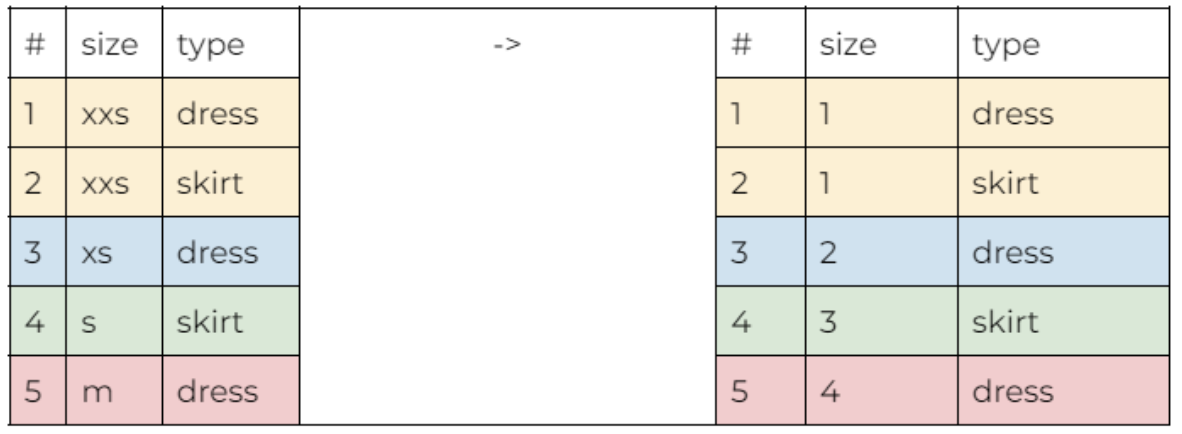

Выполним теперь кодирование порядкового признака size в Python. Порядковое кодирование в библиотеке реализовано в классе OrdinalEncoder. По умолчанию все строковые столбцы будут закодированы.

Метод fit_transform устанавливает соответствия для кодирования и преобразовывает данные в соответствие с ними. Затем используем метод concat() для добавления закодированного признака в датафрейм data.

In [74]:
# создаем объект OrdinalEncoder, col - имя столбца, mapping - словарь с описанием кодировки
ord_encoder = ce.OrdinalEncoder(mapping=[{
	'col': 'size',
	'mapping': {'xxs': 1, 'xs': 2, 's': 3, 
                'm': 4, 'l': 5, 'xxl': 6}
}])
# применяем трансформацию к столбцу
data_bin = ord_encoder.fit_transform(clothing[['size']])
# добавляем результат к исходному DataFrame
clothing = pd.concat([clothing, data_bin], axis=1)

clothing

,size,type,size
0,xxs,dress,1
1,xxs,skirt,1
2,xs,dress,2
3,s,skirt,3
4,m,dress,4
5,l,shirt,5
6,s,coat,3
7,m,coat,4
8,xxl,shirt,6
9,l,dress,5


Порядковое кодирование может успешно использоваться для кодирования порядковых признаков. Мы можем закодировать признак size — размер одежды со значениями xxs, xs, s соответственно в значения 1, 2, 3. Это будет логично, и моделью не будут сделаны выводы о неправильном порядке. Увеличение размера будет соответствовать логическому увеличению кода этого значения: xxs меньше xs, и числовой код 1 (xxs) меньше, чем числовой код 2 (xs).

Однако порядковое кодирование плохо работает для номинальных признаков. Ошибку при кодировании мы не получим, но алгоритмы машинного обучения не могут различать категории и числовые признаки, поэтому могут быть сделаны выводы о неправильном порядке. 

Пример

Мы решили узнать, влияет ли знак зодиака на успешное продвижение по службе. Мы собрали данные добровольцев и пытаемся спроектировать признаки для дальнейшей предсказательной модели. Признак знак зодиака мы не можем в изначальном виде передать в модель, так как он строковый. Признак зодиака является номинальным. Закодируем его при помощи порядкового кодирования: 

1 — овен

2 — телец

3 — близнецы

4 — рак

…

12 — рыбы

Мы получим признак в числовом представлении, и модель машинного обучения будет воспринимать знак зодиака как числовой признак. Ошибочен ли вывод, что чем больше числовой код знака зодиака, тем лучше (или наоборот хуже), как это было бы в порядковом признаке? Да, так как эти категории независимы. Ошибки мы не получим, однако для номинальных признаков существует более эффективные типы кодирования, которые мы рассмотрим позже.

В случае с магазином одежды для размера одежды size уместно применить порядковое кодирование. Кодирование размера xxs, xs, s в 1, 2, 3 будет соответствовать логическому увеличению порядка.

А для номинального признака type необходимо подобрать другое кодирование. Мы сделаем это далее в юните при знакомстве с OneHot-кодированием.

## ОДНОКРАТНОЕ КОДИРОВАНИЕ. ONE-HOT ENCODING

Однократное кодирование (его ещё часто называют «горячим») является автоматизированным кодированием, которое мы делали в юните Создание признаков. Для каждой новой категории создается новый бинарный признак. Значение 1 в этих признаках проставляется там, где значение исходного признака равно этой категории. 

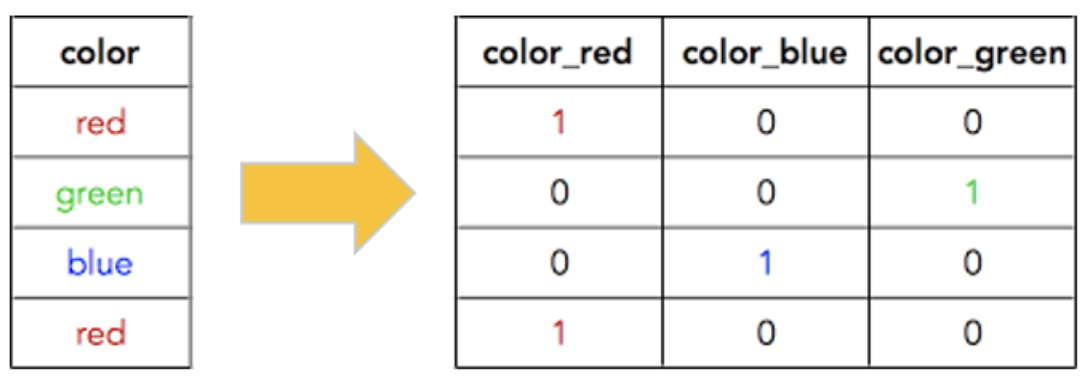

На рисунке изображено кодирование колонки color со значениями red, green, blue. Для каждого значения создаётся новый бинарный признак: red -> color_red, blue -> color_blue, green -> color_green, и проставляются значения исходного признака. 

Этот способ кодирования понятен, хорошо работает как на номинальных, так и на порядковых признаках. Однако существует один минус: количество созданных признаков равно количеству уникальных значений категориального признака. 

В нашем примере с признаком color мы получили три новых признака color_red color_blue, color_green. Но представьте, что в наборе данных у нас попадётся признак с большим количеством категорий.

Пример 

Компания, выпускающая аромасвечи, решила узнать, влияет ли регион клиента на выбор их продукции. Признак регион является номинальным, и по правилам блок-схемы мы должны закодировать его однократным кодированием. Таким образом, кодирование признака регион даст нам 84 дополнительных признака для модели. Это может привести к серьёзным проблемам с памятью на наборах с большим количеством строк. 

Вернёмся к датасету clothing. Закодируем признак type однократным кодированием. Результат кодирования будет выглядеть так: 

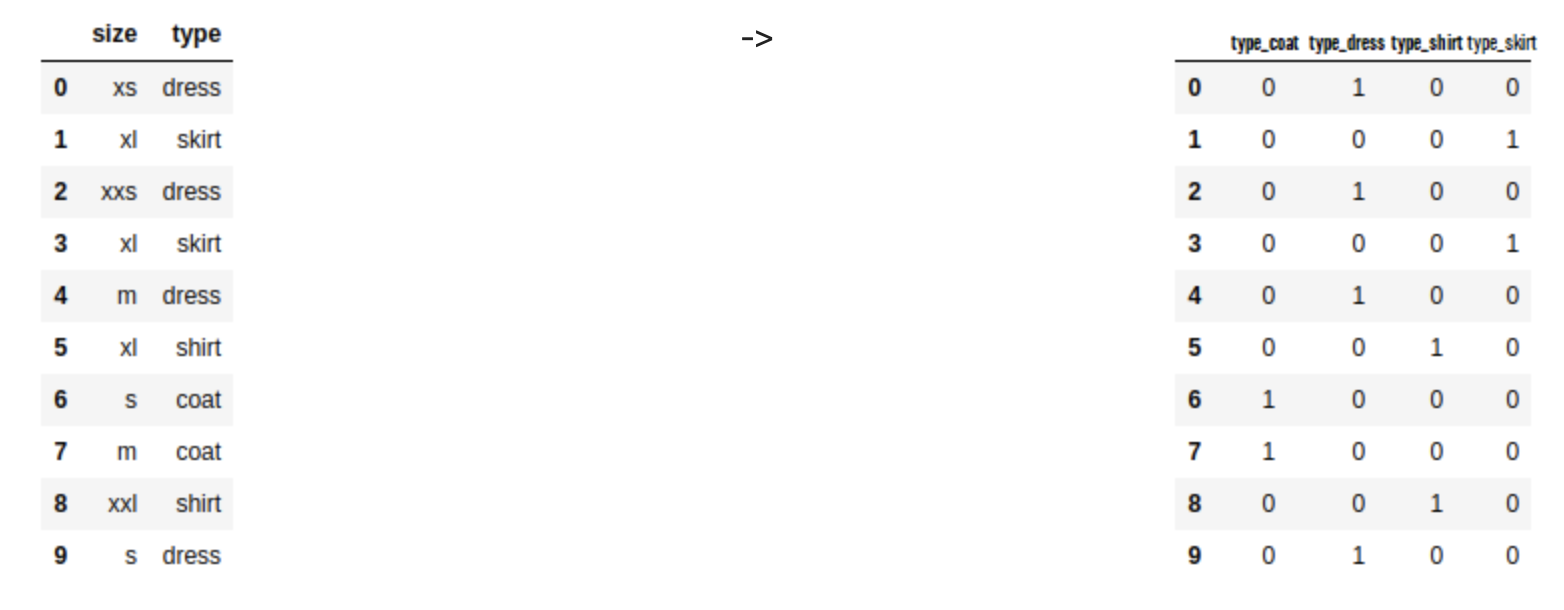

Закодируем признак type в Python. Используем класс OneHotEncoding библиотеки category_encoders. Укажем в cols наименование признака type для кодировки, иначе будут закодированы все строковые столбцы.

In [75]:
encoder = ce.OneHotEncoder(cols=['type'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,size,type_dress,type_skirt,type_shirt,type_coat
0,xxs,dress,1,1,0,0,0
1,xxs,skirt,1,0,1,0,0
2,xs,dress,2,1,0,0,0
3,s,skirt,3,0,1,0,0
4,m,dress,4,1,0,0,0
5,l,shirt,5,0,0,1,0
6,s,coat,3,0,0,0,1
7,m,coat,4,0,0,0,1
8,xxl,shirt,6,0,0,1,0
9,l,dress,5,1,0,0,0


Таким образом, мы получили четыре новых признака для категорий ``coat``, ``dress``, ``shirt``, ``skirt``. В строке нужного типа исходного признака стоит значение 1, в остальных строках — 0. Эти признаки пригодны для обучения.

На самом деле метод однократного кодирования реализован в pandas в функции pd.get_dummies(). Для выполнения кодирования достаточно передать в функцию DataFrame и указать столбцы, для которых должно выполняться кодирование. По умолчанию кодирование выполняется для всех столбцов типа object:

In [76]:
clothing_dummies = pd.get_dummies(clothing, columns=['type'])
clothing_dummies

,size,size,type_dress,type_skirt,type_shirt,type_coat,type_coat,type_dress,type_shirt,type_skirt
0,xxs,1,1,0,0,0,False,True,False,False
1,xxs,1,0,1,0,0,False,False,False,True
2,xs,2,1,0,0,0,False,True,False,False
3,s,3,0,1,0,0,False,False,False,True
4,m,4,1,0,0,0,False,True,False,False
5,l,5,0,0,1,0,False,False,True,False
6,s,3,0,0,0,1,True,False,False,False
7,m,4,0,0,0,1,True,False,False,False
8,xxl,6,0,0,1,0,False,False,True,False
9,l,5,1,0,0,0,False,True,False,False


### Задание 5.4

В нашем наборе данных винных обзоров признак, обозначающий имя сомелье (taster_name), является номинальным. Закодируйте его, используя One-Hot Encoding.

В ответе напишите, сколько признаков добавилось после применения кодирования.



In [77]:
wine_data = pd.read_csv('data/wine_cleared.csv')

In [78]:
encoder = ce.OneHotEncoder(cols=['taster_name'])
type_bin = encoder.fit_transform(wine_data['taster_name'])
wine_data = pd.concat([wine_data, type_bin], axis=1)
wine_data.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,taster_name_11,taster_name_12,taster_name_13,taster_name_14,taster_name_15,taster_name_16,taster_name_17,taster_name_18,taster_name_19,taster_name_20
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,0,0,0,0,0,0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,0,0,0,0,0,0,0,0,0,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,0,0


## ДВОИЧНОЕ КОДИРОВАНИЕ

Принцип двоичного кодирования похож на однократное кодирование, но создаёт меньше столбцов. При однократном кодировании признака с количеством уникальных категорий 100 шт. мы создадим 100 новых признаков, а при двоичном кодирования мы сгенерируем всего 7 признаков.

На рисунке ниже представлен алгоритм бинарного кодирования температуры воздуха.

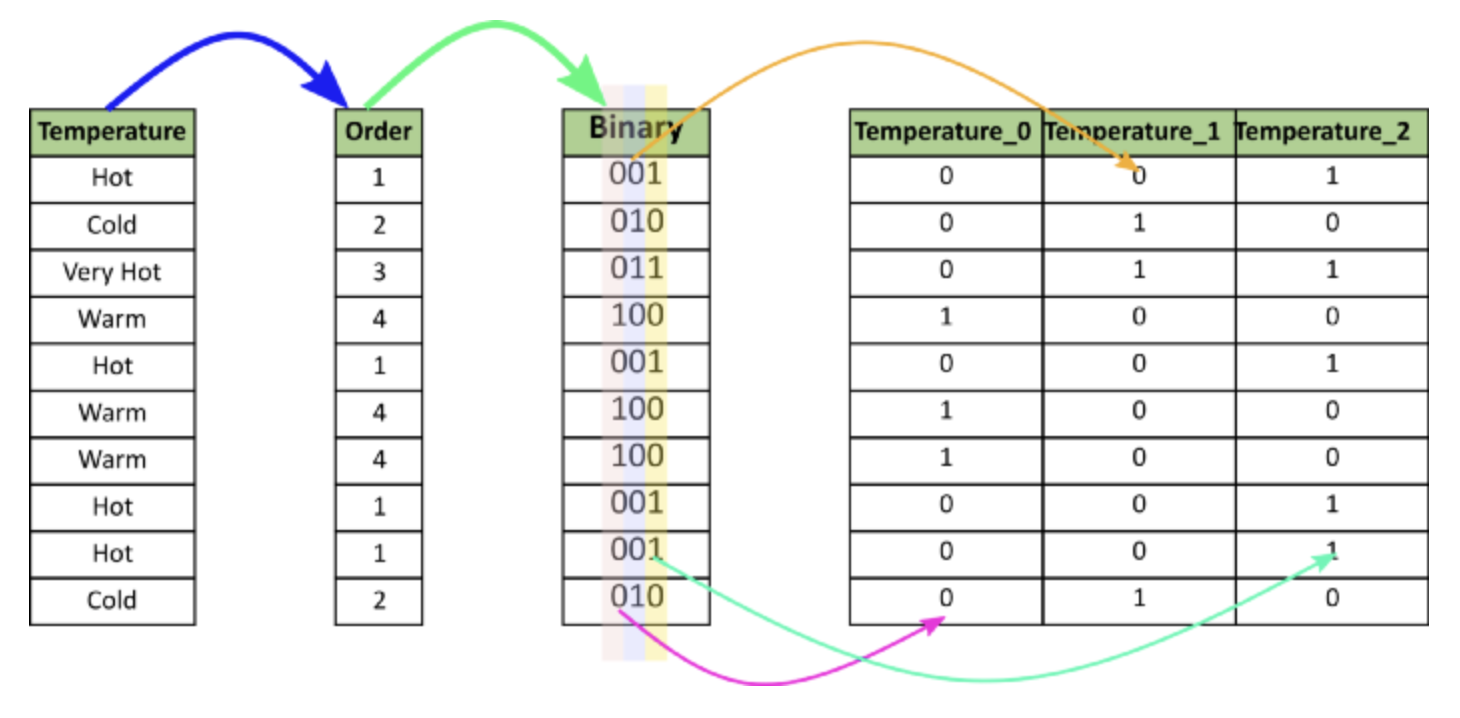

1. Сначала признак кодируется в числовое представление, как мы делали это при кодировании порядковых признаков: hot — 1, cold — 2, … и так далее.

2. Затем каждое числовое представление, выраженное целым числом, переводится в двоичный код: 1 – 001, 2 – 010, 3 – 011,... и так далее.

3. Затем для каждого двоичного представления создаются новые признаки. В нашем случае двоичное представления уместилось в три числа, поэтому итогом стало создание трёх новых признаков.

Пошаговый алгоритм двоичного кодирования можно описать так: 

* значения признака кодируются в некоторый числовой порядок;
* целые числа кодируются в двоичный код;
* цифры двоичного представления формируют новые столбцы.

Вернёмся к примеру с магазином одежды. Закодируем бинарным способом признак type в Python. Используем класс BinaryEncoder библиотеки category_encoders.

In [79]:
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])

In [80]:
bin_encoder = ce.BinaryEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,type_0,type_1,type_2
0,xxs,dress,0,0,1
1,xxs,skirt,0,1,0
2,xs,dress,0,0,1
3,s,skirt,0,1,0
4,m,dress,0,0,1
5,l,shirt,0,1,1
6,s,coat,1,0,0
7,m,coat,1,0,0
8,xxl,shirt,0,1,1
9,l,dress,0,0,1


Вернёмся к нашему примеру с винным датасетом (файл wine_cleared.csv), который мы будем использовать в его исходном виде. Признак country содержит много уникальных значений — используем двоичную кодировку признака.

## Задание 5.5

Закодируйте признак country двоичным способом.

Сколько новых признаков образовалось после кодирования признака country?



In [81]:
wine_data = pd.read_csv('data/wine_cleared.csv')

In [82]:
bin_encoder = ce.BinaryEncoder(cols=['country'])
type_bin = bin_encoder.fit_transform(wine_data['country'])
wine_data = pd.concat([wine_data, type_bin], axis=1)
wine_data.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,country_0,country_1,country_2,country_3,country_4,country_5
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,0,0,0,0,0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,0,0,0,0,1,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,0,0,0,0,1,1


Метод однократного кодирования можно использовать почти во всех сценариях подготовки данных к обучению за исключением некоторых алгоритмов и проблем с памятью. О том, почему из-за этого может возникнуть проблема, вы узнаете подробнее в модулях про машинное обучение. 

В случаях проблем с памятью необходимо обратиться к другим кодировщикам — к порядковому, бинарному кодировщику или иным.

Методы, рассмотренные в модуле, популярны и очень часто используются в кодировании данных за счёт своей простоты, понятности и лёгкости в реализации. Про другие, менее популярные способы кодирования вы можете прочитать в документации к используемой нами библиотеке category_encoders.

Выбор подходящего метода кодирования может быть непростой задачей при проектировании признаков. Поэтому всегда необходимо тестировать несколько способов кодирования и выбирать тот, с помощью которого получается качественная предсказательная модель. О том, как измерить качество модели, вы узнаете далее в курсе в модулях про машинное обучение.

### Задание 5.8

На основе изученного материала определите подходящий способ кодирования признака taster_twitter_handle из датасета винных обзоров и закодируйте его.

В ответе напишите, сколько признаков добавилось после применения кодирования.

In [83]:
wine_data = pd.read_csv('data/wine_cleared.csv')

In [84]:
bin_encoder = ce.BinaryEncoder(cols=['taster_twitter_handle'])
type_bin = bin_encoder.fit_transform(wine_data['taster_twitter_handle'])
wine_data = pd.concat([wine_data, type_bin], axis=1)
wine_data.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,0,0,0,0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,0,0,0,1,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,0,0,0,1,1
